In [175]:
import climatedata_functions as climf

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.simplefilter("ignore")


In [142]:
#read csv
metadata = pd.read_csv("../data/metadata_temp_12_01_06_complete.csv")
train_labels = pd.read_csv("../data/train_labels.csv")
#meta_complete = train_labels.merge(
#    metadata, how="left", left_on="uid", right_on="uid", validate="1:1")

In [143]:
meta_complete.head(1)


uid   region  severity  density  Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  \
0  aabm  midwest         1    585.0           0             0               0   

    latitude  longitude        date  split  longitude_trans  x_grid  y_grid  \
0  39.080319 -86.430867  2018-05-14  train       273.569133     570    1217   

                                             temp_01  \
0  287.3599, 287.36548, 287.3154, 287.20593, 287....   

                                             temp_12  \
0  287.3912, 287.32434, 287.29132, 287.193, 287.0...   

                                             temp_06  
0  287.36844, 287.32245, 287.33054, 287.1744, 287...

In [144]:
warnings.simplefilter(action='ignore')
for i in range(len(metadata.temp_01)):
    metadata.temp_01[i] = str(metadata.temp_01[i])
for i in range(len(metadata.temp_01)):
    metadata.temp_06[i] = str(metadata.temp_06[i])
for i in range(len(metadata.temp_01)):
    metadata.temp_12[i] = str(metadata.temp_12[i])

In [145]:
warnings.simplefilter(action='ignore')

for i in range(len(metadata.temp_01)):
    metadata.temp_01[i] = metadata.temp_01[i][1:-1]

for i in range(len(metadata.temp_06)):
    metadata.temp_06[i] = metadata.temp_06[i][1:-1]

for i in range(len(metadata.temp_12)):
    metadata.temp_12[i] = metadata.temp_12[i][1:-1]

In [146]:
string = metadata.temp_01[0]

In [147]:
list_temp = []
for x in (string.split(",")):
    x = replace_nan(x)
    list_temp.append(x)
print(list_temp)


[287.3599, 287.36548, 287.3154, 287.20593, 287.06152, 286.8228, 286.71948]


Looking for the error:

In [148]:
for idx in metadata.index: #takes first element in metadata list
    string = metadata.temp_01[idx]
    list_temp = []
    print(idx, string)
    for x in (string.split(",")):
        x = replace_nan(x)
        list_temp.append(x)
#print(metadata.temp_01[382])#272,382

0 287.3599, 287.36548, 287.3154, 287.20593, 287.06152, 286.8228, 286.71948
1 296.57178, 293.3236, 291.91608, 292.43445, nan, 291.01877, 292.902
2 274.84113, 279.1203, 279.9865, 292.71667, 283.03088, 285.0816, 289.85443
3 294.81213, 295.3043, 297.76993, 300.13126, 299.93506, 300.83835, 300.1513
4 297.67825, 300.68784, 305.18024, 305.14374, 305.627, 304.5896, 303.31586
5 298.30823, 299.5826, 296.98428, 297.08267, 296.40448, 297.2407, 295.51337
6 280.15173, 282.69662, 279.97064, 273.6761, 279.23276, 282.53912, 280.3231
7 298.71072, 296.73575, 295.66483, 297.58878, 297.29572, 297.2269, 298.1987
8 nan, nan, nan, 295.2475, 297.1085, 297.03256, 298.5225
9 293.56998, 297.03845, 299.23264, 297.92194, 300.04404, 298.6169, 298.48325
10 nan, nan, nan, nan, nan, nan, nan
11 295.73022, 294.10934, 295.97903, 297.83847, 298.26605, 295.6896, 298.63184
12 292.23914, 292.86743, 294.1546, 293.35486, 292.47467, 292.6496, 294.22964
13 287.3561, 285.28372, 284.21225, 287.88574, 287.61984, 290.6191, 287.4611


ValueError: could not convert string to float: 'a'

It seems as there is an error in the columns -->on positipn 272 there is just an 'a' instead of a list of nans or floats#

Check if something is wrong with the files

In [149]:
from datetime import timedelta
import warnings
warnings.simplefilter(action='ignore')

temp_list = []
hour = 1 #which our of the day
start_date = metadata.date[382]#272,382 were not right
date_index_list = metadata.index[metadata.date == start_date]
start_date = climf.get_start_date(start_date)
days = 7

temp_list = [[0] * days for i in range(len(date_index_list))]#make list of lists to store the values inside
for x in range(days):
    count = 0
    day_date = start_date - timedelta(days=x)
    ds, stop = climf.get_ds_aws(day_date, hour)#getting the temperature array for the specified date
    for index in date_index_list:
        x_grid = metadata.x_grid[index]
        y_grid = metadata.y_grid[index]
        if stop == True:
            temp_list[count][x] = np.nan
        else:
            temp_list[count][x] = ds[x_grid][y_grid]
        count += 1
        if x == days-1 and index == date_index_list[len(date_index_list)-1]:#if condition is met put the values in the metadata file
            for i in range(len(temp_list)):                    
                metadata.temp_01.loc[date_index_list[i]] = temp_list[i] #not index but  
    else:
        continue 

for i in date_index_list:
    metadata.temp_01[i] = str(metadata.temp_01[i])
for i in date_index_list:
    metadata.temp_01[i] = metadata.temp_01[i][1:-1]

In [150]:
print(metadata.temp_01[date_index_list])
for idx in metadata.index: #takes first element in metadata list
    string = metadata.temp_01[idx]
    list_temp = []
    print(idx, string)
    for x in (string.split(",")):
        x = replace_nan(x)
        list_temp.append(x)

382      297.3042, 295.42175, 294.85922, 296.67178, 296...
1747     292.8667, 290.29675, 290.10922, 289.98428, 291...
3967     297.6167, 293.35925, 297.10922, 296.98428, 298...
7412     294.4292, 293.67175, 294.23422, 296.29678, 297...
9208     296.8667, 293.17175, 294.42172, 296.04678, 292...
13174    296.8667, 293.17175, 294.42172, 296.04678, 292...
14790    296.6792, 292.92175, 294.17172, 295.92178, 292...
15850    294.9292, 294.60925, 293.98422, 294.04678, 294...
16204    294.5542, 294.29675, 293.54672, 293.29678, 293...
16951    298.4917, 297.67175, 297.73422, 295.73428, 298...
17614    292.8667, 290.29675, 290.10922, 289.98428, 291...
19283    298.3042, 297.17175, 298.04672, 297.79678, 298...
22947    290.8042, 290.67175, 292.73422, 290.17178, 293...
Name: temp_01, dtype: object
0 287.3599, 287.36548, 287.3154, 287.20593, 287.06152, 286.8228, 286.71948
1 296.57178, 293.3236, 291.91608, 292.43445, nan, 291.01877, 292.902
2 274.84113, 279.1203, 279.9865, 292.71667, 283.03088, 285.0

Now it works, check 06 and 12 also

### temp_06

In [151]:
for idx in metadata.index: #takes first element in metadata list
    string = metadata.temp_06[idx]
    list_temp = []
    print(idx, string)
    for x in (string.split(",")):
        x = replace_nan(x)
        list_temp.append(x)

0 287.36844, 287.32245, 287.33054, 287.1744, 287.0452, 286.8359, 286.74725
1 290.52673, 289.31335, 286.42764, 286.5656, nan, nan, nan
2 272.54877, 275.38806, 276.32675, 284.8081, 283.19238, 281.67688, 286.5667
3 nan, 289.81992, 295.1149, nan, 297.08835, 297.84003, nan
4 289.93112, 293.8225, 299.7835, 300.02002, 299.92813, 299.75632, 298.71417
5 294.50742, 293.57712, 293.2201, 292.60428, 293.99872, 294.45538, 293.41278
6 278.98337, 281.29132, 279.66254, 270.35565, 273.75336, 281.01294, 280.1717
7 297.2597, 295.6586, 291.7781, 295.42505, 295.05365, 293.92505, 296.01865
8 nan, nan, nan, 294.57123, 293.52072, 293.54218, 295.1857
9 291.58173, 295.50848, 295.7522, 295.07703, 297.10236, 295.64752, 297.2366
10 nan, nan, nan, nan, nan, nan, nan
11 293.11884, 289.01266, 290.44528, 296.63202, 295.1607, 295.939, 295.02222
12 290.6753, 291.1115, 287.536, 287.43906, 286.19495, 285.83328, 289.39456
13 283.06714, 280.43304, 280.7889, 283.69775, 283.7183, 293.4729, 285.42328
14 284.70892, 285.6732, 292

Looks good, no error message

### temp_12

In [152]:
for idx in metadata.index: #takes first element in metadata list
    string = metadata.temp_12[idx]
    list_temp = []
    print(idx, string)
    for x in (string.split(",")):
        x = replace_nan(x)
        list_temp.append(x)

0 287.3912, 287.32434, 287.29132, 287.193, 287.0475, 286.85315, 286.69934
1 286.90393, 286.4996, 287.33185, 287.949, 288.67786, 288.10834, 286.99545
2 273.60385, 275.0081, 277.22937, 282.50116, 285.8595, 281.18506, 285.7143
3 nan, nan, 298.3215, nan, 301.2425, 303.88962, nan
4 290.9142, 294.3446, 299.29022, 300.99426, 300.56018, 299.70978, 300.36365
5 299.01477, 298.3748, 298.4015, 298.1214, 298.53336, 299.30923, 295.93585
6 275.14075, 278.873, 280.21036, 274.53577, 273.36887, 278.9411, 280.39886
7 299.47052, 297.33746, 298.17932, 300.44818, 300.38257, 298.04633, 301.17883
8 nan, nan, nan, 294.76355, 298.8513, 298.58264, 299.96854
9 294.16013, 299.70944, 303.07, 302.65662, 302.7841, 303.08374, 303.97235
10 nan, nan, nan, nan, nan, nan, nan
11 302.70474, 298.2358, 298.25116, 300.8558, 300.1551, 297.64108, 298.99277
12 289.86078, 290.5874, 282.76953, 283.84662, 283.1361, 284.0553, 288.33893
13 280.16742, 277.86063, 277.7475, 282.2751, 280.80615, 289.51382, 284.57895
14 290.51147, 294.865

ValueError: could not convert string to float: 'a'

In [154]:
from datetime import timedelta
import warnings
warnings.simplefilter(action='ignore')

temp_list = []
hour = 12 #which our of the day
start_date = metadata.date[4009]#776, 4009
date_index_list = metadata.index[metadata.date == start_date]
start_date = climf.get_start_date(start_date)
days = 7

temp_list = [[0] * days for i in range(len(date_index_list))]#make list of lists to store the values inside
for x in range(days):
    count = 0
    day_date = start_date - timedelta(days=x)
    ds, stop = climf.get_ds_aws(day_date, hour)#getting the temperature array for the specified date
    for index in date_index_list:
        x_grid = metadata.x_grid[index]
        y_grid = metadata.y_grid[index]
        if stop == True:
            temp_list[count][x] = np.nan
        else:
            temp_list[count][x] = ds[x_grid][y_grid]
        count += 1
        if x == days-1 and index == date_index_list[len(date_index_list)-1]:#if condition is met put the values in the metadata file
            for i in range(len(temp_list)):                    
                metadata.temp_12.loc[date_index_list[i]] = temp_list[i] #not index but  
    else:
        continue 

for i in date_index_list:
    metadata.temp_12[i] = str(metadata.temp_12[i])
for i in date_index_list:
    metadata.temp_12[i] = metadata.temp_12[i][1:-1]

In [155]:
print(metadata.temp_12[date_index_list])
for idx in metadata.index: #takes first element in metadata list
    string = metadata.temp_12[idx]
    list_temp = []
    print(idx, string)
    for x in (string.split(",")):
        x = replace_nan(x)
        list_temp.append(x)

4009     278.0642, 277.324, 278.0362, 278.48816, 281.21...
4682     263.0642, 269.199, 269.7862, 271.86316, 268.46...
15263    285.5642, 278.199, 274.8487, 290.42566, 288.34...
Name: temp_12, dtype: object
0 287.3912, 287.32434, 287.29132, 287.193, 287.0475, 286.85315, 286.69934
1 286.90393, 286.4996, 287.33185, 287.949, 288.67786, 288.10834, 286.99545
2 273.60385, 275.0081, 277.22937, 282.50116, 285.8595, 281.18506, 285.7143
3 nan, nan, 298.3215, nan, 301.2425, 303.88962, nan
4 290.9142, 294.3446, 299.29022, 300.99426, 300.56018, 299.70978, 300.36365
5 299.01477, 298.3748, 298.4015, 298.1214, 298.53336, 299.30923, 295.93585
6 275.14075, 278.873, 280.21036, 274.53577, 273.36887, 278.9411, 280.39886
7 299.47052, 297.33746, 298.17932, 300.44818, 300.38257, 298.04633, 301.17883
8 nan, nan, nan, 294.76355, 298.8513, 298.58264, 299.96854
9 294.16013, 299.70944, 303.07, 302.65662, 302.7841, 303.08374, 303.97235
10 nan, nan, nan, nan, nan, nan, nan
11 302.70474, 298.2358, 298.25116, 300.8558,

In [156]:
metadata.to_csv("../data/metadata_temp_12_01_06_complete_without_a.csv")


In temp_06 there was no error message - it seems like it always put an a, when the download loop had to be started again. (temp_06 was downloaded without Unterbrechungen).

Note if the download works without breaks, the output will be in a list. The whole procedure from above may be unnecessary then.

Looks good, too. Continuing with the EDA, save file and continue with EDA

## EDA

In [157]:
def replace_nan(x):
    if x=="nan":
        return np.nan
    else :
        return float(x)

def convert_str_to_list(data, features):
    for feature in features : 
        data[feature]=data[feature].apply(lambda x: [ replace_nan(X) for X in x.split(",")])
    return data
    

In [158]:
features = ['temp_01', 'temp_06', 'temp_12']
convert_str_to_list(metadata, features)

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1   uid   latitude   longitude  \
0               0             0               0  aabm  39.080319  -86.430867   
1               1             1               1  aabn  36.559700 -121.510000   
2               2             2               2  aacd  35.875083  -78.878434   
3               3             3               3  aaee  35.487000  -79.062133   
4               4             4               4  aaff  38.049471  -99.827001   
...           ...           ...             ...   ...        ...         ...   
23565       23565         23565           23565  zzvv  36.708500 -121.749000   
23566       23566         23566           23566  zzwo  39.792190  -99.971050   
23567       23567         23567           23567  zzwq  35.794000  -79.012551   
23568       23568         23568           23568  zzyb  35.742000  -79.238600   
23569       23569         23569           23569  zzzi  39.767323  -96.028617   

             date  split  longitude_trans  x_grid  y_grid  \
0      2018-05-14  train       273.569133     570    1217   
1      2016-08-31   test       238.490000     550     192   
2      2020-11-19  train       281.121566     488    1455   
3      2016-08-24  train       280.937867     473    1453   
4      2019-07-23  train       260.172999     513     831   
...           ...    ...              ...     ...     ...   
23565  2014-12-02   test       238.251000     557     187   
23566  2017-06-19  train       260.028950     578     829   
23567  2015-03-24  train       280.987449     484    1452   
23568  2016-11-21  train       280.761400     481    1446   
23569  2015-08-31   test       263.971383     576     941   

                                                 temp_01  \
0      [287.3599, 287.36548, 287.3154, 287.20593, 287...   
1      [296.57178, 293.3236, 291.91608, 292.43445, na...   
2      [274.84113, 279.1203, 279.9865, 292.71667, 283...   
3      [294.81213, 295.3043, 297.76993, 300.13126, 29...   
4      [297.67825, 300.68784, 305.18024, 305.14374, 3...   
...                                                  ...   
23565  [286.12183, 282.44885, 280.6194, 280.84546, 28...   
23566  [292.20428, 291.85342, 291.7546, 291.546, 291....   
23567  [275.4624, 282.38794, 280.27734, 278.79596, 27...   
23568  [272.79578, 274.20514, 282.0634, nan, 277.4688...   
23569  [293.74, 288.5006, 290.1974, 294.22528, 294.59...   

                                                 temp_12  \
0      [287.3912, 287.32434, 287.29132, 287.193, 287....   
1      [286.90393, 286.4996, 287.33185, 287.949, 288....   
2      [273.60385, 275.0081, 277.22937, 282.50116, 28...   
3      [nan, nan, 298.3215, nan, 301.2425, 303.88962,...   
4      [290.9142, 294.3446, 299.29022, 300.99426, 300...   
...                                                  ...   
23565  [286.12183, 282.44885, 280.6194, 280.84546, 28...   
23566  [292.17377, 291.8933, 291.7925, 291.56027, 291...   
23567  [275.4624, 282.38794, 280.27734, 278.79596, 27...   
23568  [272.79578, 274.20514, 282.0634, nan, 277.4688...   
23569  [293.74, 288.5006, 290.1974, 294.22528, 294.59...   

                                                 temp_06  
0      [287.36844, 287.32245, 287.33054, 287.1744, 28...  
1      [290.52673, 289.31335, 286.42764, 286.5656, na...  
2      [272.54877, 275.38806, 276.32675, 284.8081, 28...  
3      [nan, 289.81992, 295.1149, nan, 297.08835, 297...  
4      [289.93112, 293.8225, 299.7835, 300.02002, 299...  
...                                                  ...  
23565  [284.0719, 284.95032, 285.1338, 279.8305, 278....  
23566  [292.1838, 291.86935, 291.7547, 291.54028, 291...  
23567  [277.5207, 285.9046, 282.0757, 279.94476, 278....  
23568  [271.71722, 275.505, 280.15826, 276.03683, 276...  
23569  [291.1406, 288.53122, nan, 293.71753, 292.2348...  

[23570 rows x 14 columns]

In [160]:
features = ['temp_01', 'temp_06', 'temp_12']
for feat in features:
    metadata[str(feat + '_mean')] = ''

metadata.head(1)

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1   uid   latitude  longitude  \
0           0             0               0  aabm  39.080319 -86.430867   

         date  split  longitude_trans  x_grid  y_grid  \
0  2018-05-14  train       273.569133     570    1217   

                                             temp_01  \
0  [287.3599, 287.36548, 287.3154, 287.20593, 287...   

                                             temp_12  \
0  [287.3912, 287.32434, 287.29132, 287.193, 287....   

                                             temp_06 temp_01_mean  \
0  [287.36844, 287.32245, 287.33054, 287.1744, 28...                

  temp_06_mean temp_12_mean  
0

In [ ]:
sum(metadata.temp_01[1])/len(metadata.temp_01[1]) #contains 1 nan

np.nanmean(metadata.temp_01[1])

In [167]:
features = ['temp_01', 'temp_06', 'temp_12']

for feat in features:
    for i in metadata.index:
        metadata[str(feat + '_mean')][i] = np.nanmean(metadata[feat][i])

In [170]:
rm_cols = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1']
metadata.drop(rm_cols, axis=1, inplace=True)
metadata.head(2)


uid   latitude   longitude        date  split  longitude_trans  x_grid  \
0  aabm  39.080319  -86.430867  2018-05-14  train       273.569133     570   
1  aabn  36.559700 -121.510000  2016-08-31   test       238.490000     550   

   y_grid                                            temp_01  \
0    1217  [287.3599, 287.36548, 287.3154, 287.20593, 287...   
1     192  [296.57178, 293.3236, 291.91608, 292.43445, na...   

                                             temp_12  \
0  [287.3912, 287.32434, 287.29132, 287.193, 287....   
1  [286.90393, 286.4996, 287.33185, 287.949, 288....   

                                             temp_06 temp_01_mean  \
0  [287.36844, 287.32245, 287.33054, 287.1744, 28...   287.121501   
1  [290.52673, 289.31335, 286.42764, 286.5656, na...    293.02778   

  temp_06_mean temp_12_mean  
0    287.11774   287.114264  
1    288.20833   287.495147

Merge train labels and metadata

In [171]:
train_labels = pd.read_csv("../data/train_labels.csv")
meta_complete = train_labels.merge(
    metadata, how="left", left_on="uid", right_on="uid", validate="1:1")

In [173]:
meta_complete.head(1)

uid   region  severity  density   latitude  longitude        date  split  \
0  aabm  midwest         1    585.0  39.080319 -86.430867  2018-05-14  train   

   longitude_trans  x_grid  y_grid  \
0       273.569133     570    1217   

                                             temp_01  \
0  [287.3599, 287.36548, 287.3154, 287.20593, 287...   

                                             temp_12  \
0  [287.3912, 287.32434, 287.29132, 287.193, 287....   

                                             temp_06 temp_01_mean  \
0  [287.36844, 287.32245, 287.33054, 287.1744, 28...   287.121501   

  temp_06_mean temp_12_mean  
0    287.11774   287.114264

In [199]:
features = [ 'severity', 'density', 'latitude', 'longitude',  'temp_01_mean', 'temp_06_mean', 'temp_12_mean']

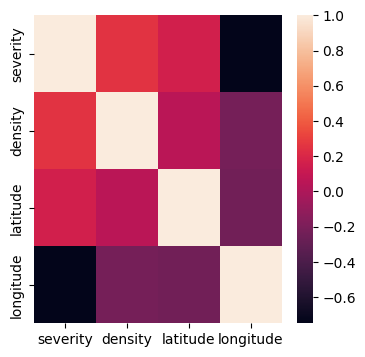

In [203]:
# Plot correlation matrix 
mask = np.triu(meta_complete[features].corr())
plt.figure(figsize = (4,4))
ax = sns.heatmap(round(meta_complete[features].corr(), 1)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdPu_r',
                 xticklabels=True, yticklabels=True)

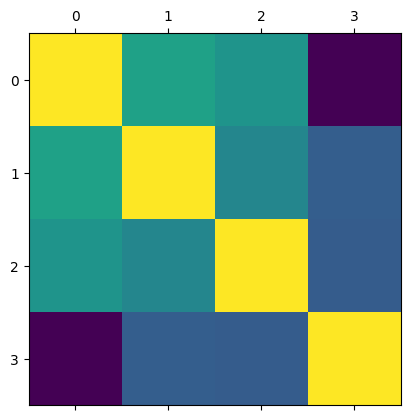

In [204]:
meta_complete[features]

import matplotlib.pyplot as plt

plt.matshow(meta_complete[features].corr())
plt.show()